<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## 차원이 있는 데이터 처리

데이터 셋 : tensorflow.keras.datasets.mnist

처음 이미지 사용 (손글씨를 이 방식으로 해결했다)

In [1]:
from tensorflow.keras.datasets.mnist import load_data

 이미지는 구성이 픽셀(점)으로 이루어져있다.

 mnist 흰색과 검은색으로 구성.(검은배경, 흰숫자)

 x_train (60000, 28, 28) 은 (행, 열, 깊이)

 y_train (60000,) 해당부분의 y의 값

In [2]:
(x_train, y_train),(x_test, y_test) = load_data(path='mnist.npz')

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

x_train 숫자 라는 것을 보여주기위한 작업( 4 번째 해당부분의 이미지)

In [3]:
y_train[4], x_train[4]  

(9, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [4]:
y_train[50000], x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [5]:
import matplotlib.pyplot as plt

9


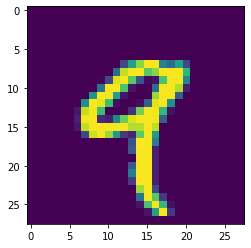

In [6]:
plt.imshow(x_train[4])
print(y_train[4])

3 <class 'numpy.uint8'>


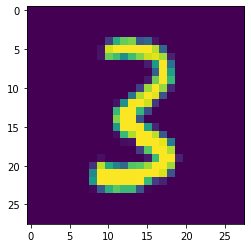

In [7]:
plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

첫번째 단계 : 3차원(이미지 2차원데이터)를 2차원(이미지 1차원데이터)로 만든다 

-1 은 한쪽 영역이 완료되면 나머지도 해준다

In [8]:
x_train = x_train.reshape(-1,28*28)
x_train.shape

(60000, 784)

In [9]:
x_test = x_test.reshape(-1,28*28)
x_test.shape

(10000, 784)

In [10]:
y_train[2:10], y_train.shape 

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

y_train의 유니크값을 확인해서 모델에서 아웃풋 dense에 10을 넣어줌을 확인

In [11]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 교육단계 Classification

y_train이 분류형 [4, 1, 9, 2, 1, 3, 1, 4]

### 모델 model

In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.models.Sequential()

In [14]:
model.add(tf.keras.Input(shape=(784))) 

In [15]:
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

*  output layer 의 activation 공식

  unique가 3개 이상 일때는 activation은 softmax를 쓴다

  긍정과 부정 처럼 분류가 2개일(2진) 경우는 binary 라고 하는데 이때는 activation을 sigmoid를 쓴다

In [18]:
model.add(tf.keras.layers.Dense(10,activation='softmax')) 

* [loss율 공식](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

연속형의 측정값 mae(절대값)

```
loss = mean(abs(y_true - y_pred), axis=-1)
```

regression 일때는 mse (오차값)

```
loss = mean(square(y_true - y_pred), axis=-1)
```

classification 일때는 categorical_crossentropy

(activation = softmax)

```
tf.keras.metrics.categorical_crossentropy(
    y_true, y_pred, from_logits=False, label_smoothing=0
)
```

sparse_categorical_crossentropy

원핫인코딩 하기 싫을 때 사용

```
tf.keras.metrics.sparse_categorical_crossentropy(
    y_true, y_pred, from_logits=False, axis=-1
)
```

binary_crossentropy

(activation = sigmoid)

```
tf.keras.metrics.binary_crossentropy(
    y_true, y_pred, from_logits=False, label_smoothing=0
)
```

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

* optimizer 

### 트레이닝

In [22]:
hist = model.fit(x_train,y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 3ms/step - loss: 7.6763 - acc: 0.8020 - val_loss: 0.6926 - val_acc: 0.8650
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4921 - acc: 0.8896 - val_loss: 0.4144 - val_acc: 0.9001
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3284 - acc: 0.9144 - val_loss: 0.3961 - val_acc: 0.9076
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2786 - acc: 0.9270 - val_loss: 0.3225 - val_acc: 0.9213
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2395 - acc: 0.9360 - val_loss: 0.3068 - val_acc: 0.9223
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2069 - acc: 0.9422 - val_loss: 0.2523 - val_acc: 0.9347
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1914 - acc: 0.9456 - val_loss: 0.2498 - val_acc: 0.9372
Epoch 8/100
1313/1313 [==============================] 

### 검증 Evaluation

In [23]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

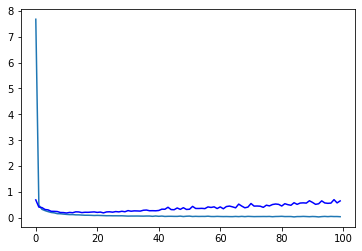

In [29]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

어큐런시 변화체크

(가로가 epochs) 

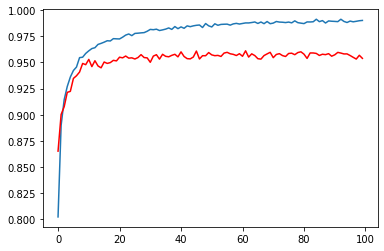

In [30]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()

## 서비스단계

In [32]:
y_test[30]

3

In [35]:

model.predict(x_test[30])

SyntaxError: ignored